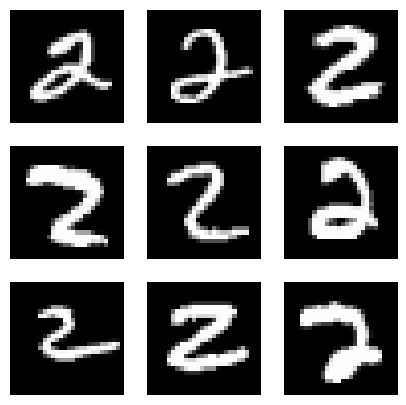

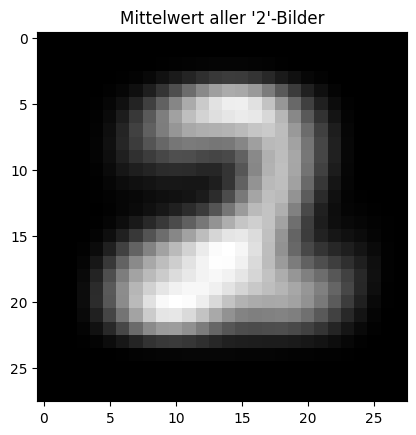

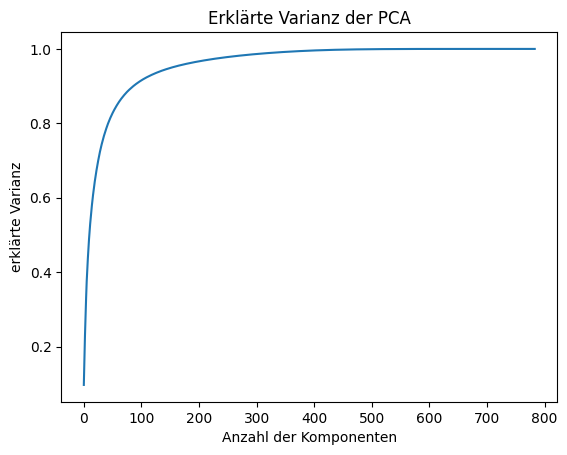

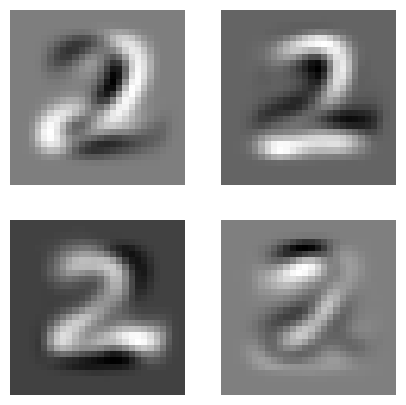

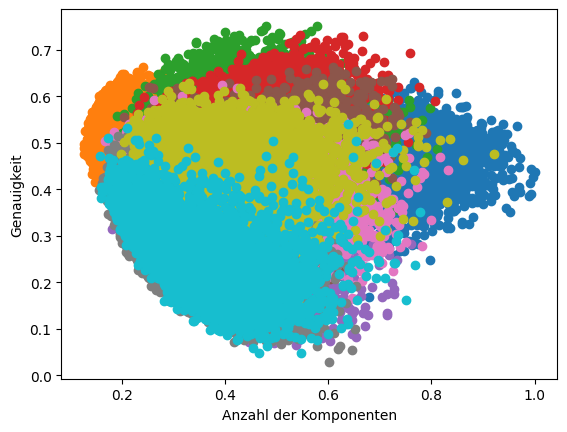

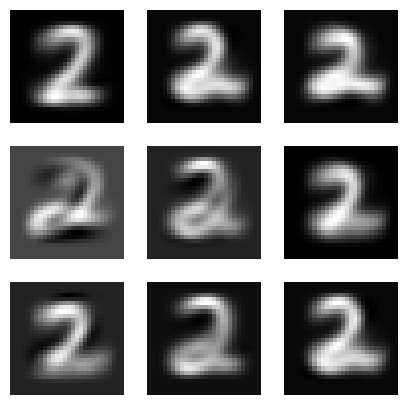

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist

# PCA-Dimensionreduktion
# 0. MNIST-Daten laden
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalisierung
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# 1. Filtern der "2"-Bilder
mask = y_train == 2
X_2 = X_train[mask]

# 2. Visualisieren der ersten 9 "2"-Bilder
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_2[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

# 3. Mittelwertbild der "2"-Bilder
mean_img = np.mean(X_2, axis=0)
plt.imshow(mean_img.reshape(28, 28), cmap='gray')
plt.title("Mittelwert aller '2'-Bilder")
plt.show()

# 4. PCA auf den Datensatz anwenden
pca = PCA()
pca.fit(X_2)
X_2_pca = pca.transform(X_2)

# Visualisierung der erklärten Varianz
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Anzahl der Komponenten")
plt.ylabel("erklärte Varianz")
plt.title("Erklärte Varianz der PCA")
plt.show()

# 5. Erste 4 Hauptkomponenten visualisieren
components = pca.components_[:4]
plt.figure(figsize=(5, 5))
for i, comp in enumerate(components):
    plt.subplot(2, 2, i + 1)
    plt.imshow(comp.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

# PCA-Klassifikation
# 6. PCA + k-NN für "2" vs. "nicht-2"
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 7. Genauigkeit visualisieren
#data_2d = np.stack([np.min(X_train_pca, axis=-1), np.max(X_train_pca, axis=-1)], axis=-1)
df_norm = (X_train_pca - np.min(X_train_pca)) / (np.max(X_train_pca) - np.min(X_train_pca))

num_clusters = 10
model = KNeighborsClassifier(n_neighbors=num_clusters)
model.fit(df_norm, y_train)
pred = model.predict(df_norm)
for cluster in range(num_clusters):
    cluster_data = df_norm[pred == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1])
# model.fit(data_2d, y_train == 2)
# pred = model.predict(data_2d)
# for cluster in range(num_clusters):
#     cluster_data = data_2d[pred == cluster]
#     plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=pred[pred == cluster])
plt.xlabel('Anzahl der Komponenten')
plt.ylabel('Genauigkeit')
plt.show()

# PCA-Datengerierung
# 10. Generierung neuer "2"-Bilder
pca = PCA(n_components=4)
X_proj = pca.fit_transform(X_2)
X_gen = (np.random.randn(20, 4) * np.std(X_proj, axis=0, keepdims=True) + np.mean(X_proj, axis=0, keepdims=True))
X_reconstructed = pca.inverse_transform(X_gen)

# 11. Visualisierung der generierten Bilder
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()